## 1. Build a DataFrame

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import nan
import warnings
warnings.filterwarnings("ignore")

In [2]:
names = ['imdbID', 'title', 'year', 'score', 'votes', 'runtime', 'genres']
data = pd.read_csv('https://raw.githubusercontent.com/cs109/content/master/imdb_top_10000.txt', delimiter='\t', names=names).dropna()

data.head()

,imdbID,title,year,score,votes,runtime,genres
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142 mins.,Crime|Drama
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154 mins.,Crime|Thriller
2,tt0137523,Fight Club (1999),1999,8.8,458173,139 mins.,Drama|Mystery|Thriller
3,tt0133093,The Matrix (1999),1999,8.7,448114,136 mins.,Action|Adventure|Sci-Fi
4,tt1375666,Inception (2010),2010,8.9,385149,148 mins.,Action|Adventure|Sci-Fi|Thriller


In [3]:
print("Number of rows: %i" % data.shape[0])

Number of rows: 9999


## 2. Clean the DataFrame

In [4]:
clean_runtime = [float(r.split(' ')[0]) for r in data.runtime]
data['runtime'] = clean_runtime
data.head()

,imdbID,title,year,score,votes,runtime,genres
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142.0,Crime|Drama
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154.0,Crime|Thriller
2,tt0137523,Fight Club (1999),1999,8.8,458173,139.0,Drama|Mystery|Thriller
3,tt0133093,The Matrix (1999),1999,8.7,448114,136.0,Action|Adventure|Sci-Fi
4,tt1375666,Inception (2010),2010,8.9,385149,148.0,Action|Adventure|Sci-Fi|Thriller


In [5]:
genres = set()
for m in data.genres:
    genres.update(g for g in m.split('|'))
genres = sorted(genres)

#make a column for each genre
for genre in genres:
    data[genre] = [genre in movie.split('|') for movie in data.genres]
         
data.head()

,imdbID,title,year,score,votes,runtime,genres,Action,Adult,Adventure,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142.0,Crime|Drama,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154.0,Crime|Thriller,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,tt0137523,Fight Club (1999),1999,8.8,458173,139.0,Drama|Mystery|Thriller,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,tt0133093,The Matrix (1999),1999,8.7,448114,136.0,Action|Adventure|Sci-Fi,True,False,True,...,False,False,False,False,False,True,False,False,False,False
4,tt1375666,Inception (2010),2010,8.9,385149,148.0,Action|Adventure|Sci-Fi|Thriller,True,False,True,...,False,False,False,False,False,True,False,True,False,False


In [6]:
data['title'] = [t[0:-7] for t in data.title]
data.head()

,imdbID,title,year,score,votes,runtime,genres,Action,Adult,Adventure,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0111161,The Shawshank Redemption,1994,9.2,619479,142.0,Crime|Drama,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,tt0110912,Pulp Fiction,1994,9.0,490065,154.0,Crime|Thriller,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,tt0137523,Fight Club,1999,8.8,458173,139.0,Drama|Mystery|Thriller,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,tt0133093,The Matrix,1999,8.7,448114,136.0,Action|Adventure|Sci-Fi,True,False,True,...,False,False,False,False,False,True,False,False,False,False
4,tt1375666,Inception,2010,8.9,385149,148.0,Action|Adventure|Sci-Fi|Thriller,True,False,True,...,False,False,False,False,False,True,False,True,False,False


## 3. Explore global properties

In [7]:
data[['score', 'runtime', 'year', 'votes']].describe()

,score,runtime,year,votes
count,9999.000000,9999.000000,9999.000000,9999.000000
mean,6.385989,103.580358,1993.471447,16605.462946
std,1.189965,26.629310,14.830049,34564.883945
min,1.500000,0.000000,1950.000000,1356.000000
25%,5.700000,93.000000,1986.000000,2334.500000
50%,6.600000,102.000000,1998.000000,4981.000000
75%,7.200000,115.000000,2005.000000,15278.500000
max,9.200000,450.000000,2011.000000,619479.000000


### Clean data that runtime is 0

In [8]:
print(len(data[data.runtime == 0]))

282


In [9]:
data.runtime[data.runtime==0] = np.nan

In [10]:
data.runtime.describe()

count    9717.000000
mean      106.586395
std        20.230330
min        45.000000
25%        93.000000
50%       103.000000
75%       115.000000
max       450.000000
Name: runtime, dtype: float64

## 4.Plotting

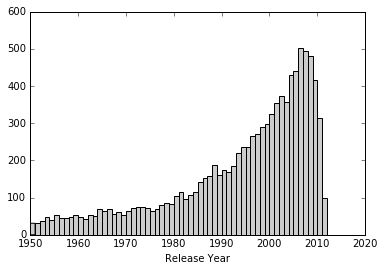

In [11]:
plt.hist(data.year, bins=np.arange(1950, 2013), color='#cccccc')
plt.xlabel("Release Year")
plt.savefig('./plots/Release_Year.png')

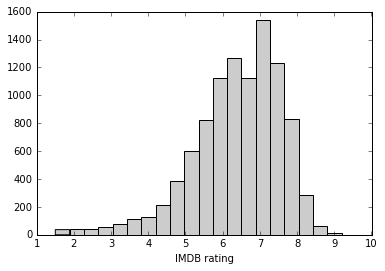

In [12]:
plt.hist(data.score, bins=20, color='#cccccc')
plt.xlabel("IMDB rating")
plt.savefig('./plots/Ratings.png')

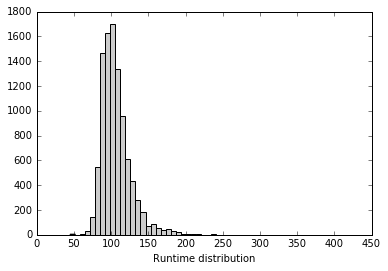

In [13]:
plt.hist(data.runtime.dropna(), bins=60, color='#cccccc')
plt.xlabel("Runtime distribution")
plt.savefig('./plots/Runtime_duration.png')

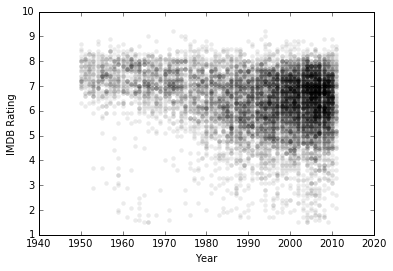

In [14]:
plt.scatter(data.year, data.score, lw=0, alpha=.08, color='k')
plt.xlabel("Year")
plt.ylabel("IMDB Rating")
plt.savefig('./plots/Scatter_Plot_Rating_in_Years.png')

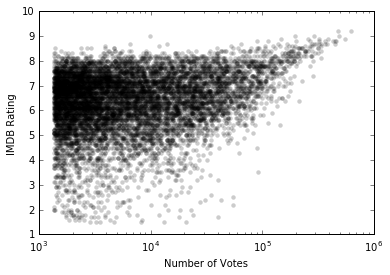

In [15]:
plt.scatter(data.votes, data.score, lw=0, alpha=.2, color='k')
plt.xlabel("Number of Votes")
plt.ylabel("IMDB Rating")
plt.xscale('log')
plt.savefig('./plots/Scatter_Plot_Ratings_based_on_Vots.png')

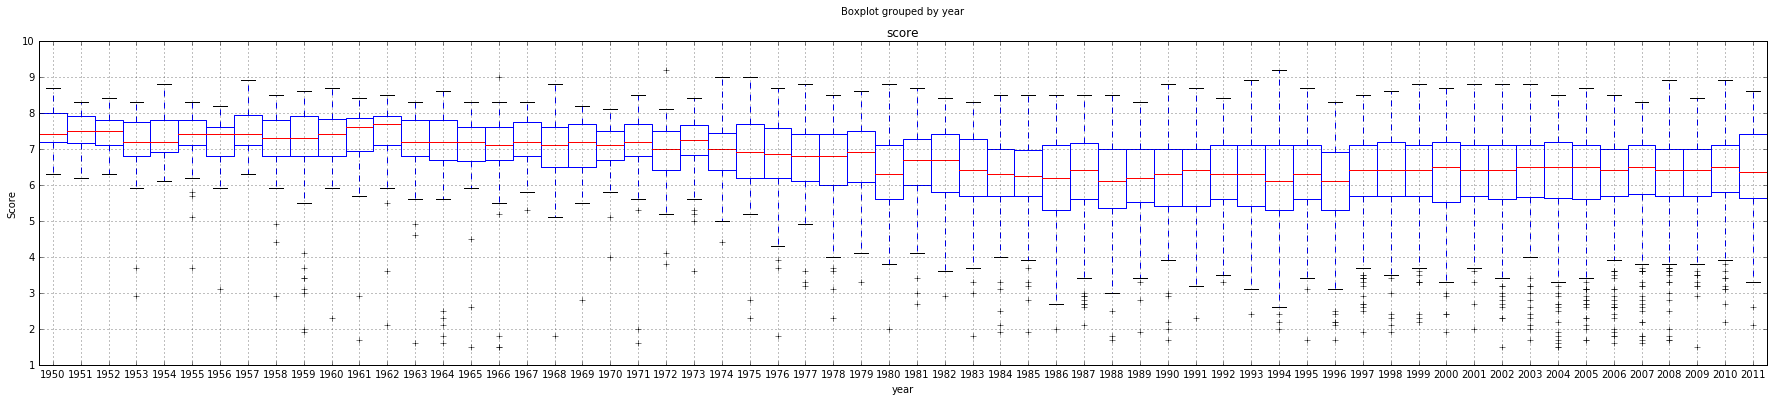

In [16]:
boxfig=data.boxplot(column=u'score', by=u'year',widths = 1,figsize=(30, 6))
plt.ylabel("Score")
plt.savefig('./plots/Boxplot.png')
plt.show()

### 4.2 Scatter plot of votes over the year

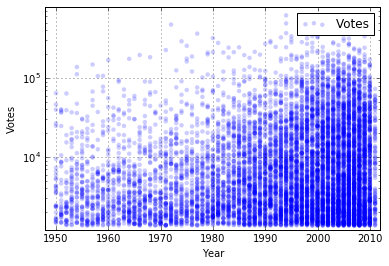

In [17]:
xvote = ['votes']
yl = data.ix[:, xvote]
yyear = ['year']
xl = data.ix[:, yyear]

x=xl
y=yl
plt.scatter(x, y, c='blue', lw =0, label='Votes',color='r',
                alpha=0.2, edgecolors='none')

plt.legend()
plt.grid(True)
plt.xlim(1948,2012)
plt.ylim(1200,800000)
plt.xlabel("Year")
plt.ylabel("Votes")
plt.yscale('log')
plt.savefig('./plots/Scatterplot_Vots.png')
plt.show()

## 5.Decade

In [18]:
decade =  (data.year // 10) * 10

tyd = data[['title', 'year']]
tyd['decade'] = decade

tyd.head()

,title,year,decade
0,The Shawshank Redemption,1994,1990
1,Pulp Fiction,1994,1990
2,Fight Club,1999,1990
3,The Matrix,1999,1990
4,Inception,2010,2010


year
1950    7.244522
1960    7.062367
1970    6.842297
1980    6.248693
1990    6.199316
2000    6.277858
2010    6.344552
Name: Decade Mean, dtype: float64


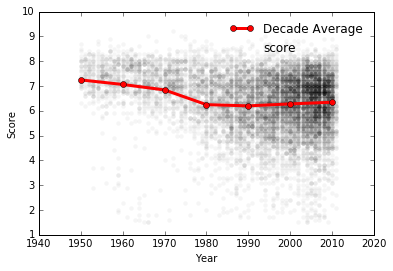

In [19]:
#mean score for all movies in each decade
decade_mean = data.groupby(decade).score.mean()
decade_mean.name = 'Decade Mean'
print(decade_mean)

plt.plot(decade_mean.index, decade_mean.values, 'o-',
        color='r', lw=3, label='Decade Average')
plt.scatter(data.year, data.score, alpha=.04, lw=0, color='k')
plt.xlabel("Year")
plt.ylabel("Score")
plt.legend(frameon=False)
plt.savefig('./plots/Average_Decade_Score.png')
plt.show()

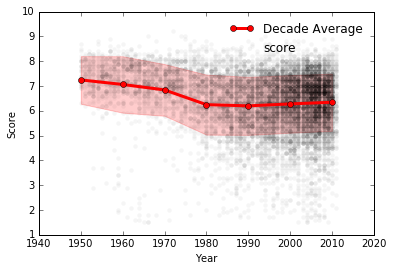

In [20]:
grouped_scores = data.groupby(decade).score

mean = grouped_scores.mean()
std = grouped_scores.std()

plt.plot(decade_mean.index, decade_mean.values, 'o-',
        color='r', lw=3, label='Decade Average')
plt.fill_between(decade_mean.index, (decade_mean + std).values,
                 (decade_mean - std).values, color='r', alpha=.2)
plt.scatter(data.year, data.score, alpha=.04, lw=0, color='k')
plt.xlabel("Year")
plt.ylabel("Score")
plt.legend(frameon=False)
plt.savefig('./plots/Average_Decade_Score_Range.png')
plt.show()

### Genres based on Year

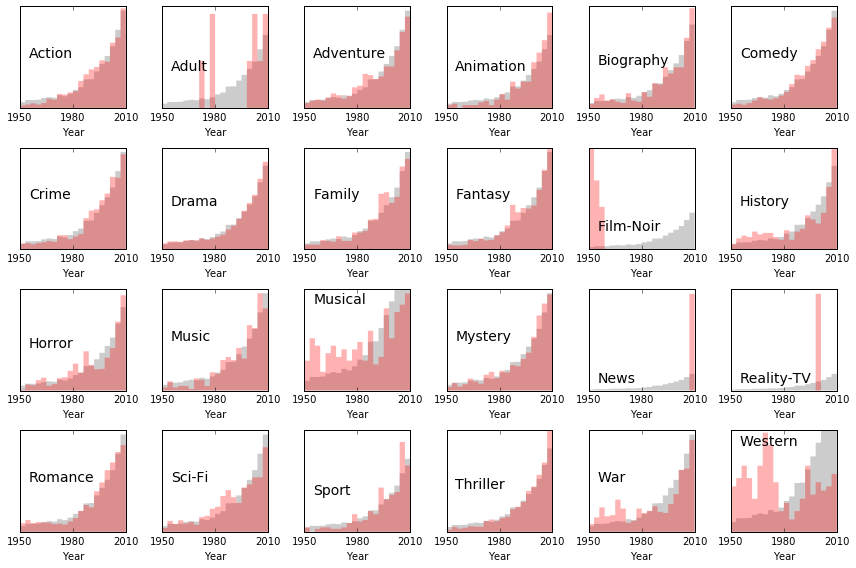

In [21]:
#create a 4x6 grid of plots.
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(12, 8), 
                         tight_layout=True)

bins = np.arange(1950, 2013, 3)
for ax, genre in zip(axes.ravel(), genres):

    ax.hist(data.year, bins=bins, histtype='stepfilled', normed=True, ec='none', color='#cccccc')
    ax.hist(data[data[genre] == 1].year, 
            bins=bins, histtype='stepfilled', normed=True, color='r', alpha=.3, ec='none')
    
    ax.annotate(genre, xy=(1955, 3e-2), fontsize=14)
    ax.xaxis.set_ticks(np.arange(1950, 2013, 30))
    ax.set_yticks([])
    ax.set_xlabel('Year')

### Genres based on Runtime

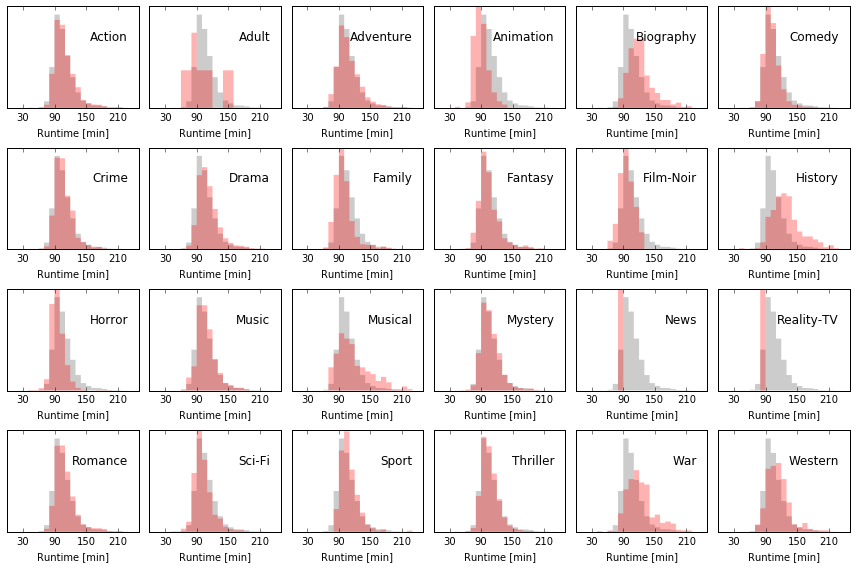

In [23]:
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(12, 8), tight_layout=True)

bins = np.arange(30, 240, 10)

for ax, genre in zip(axes.ravel(), genres):
    ax.hist(data[data[genre] == 1].runtime, 
            bins=bins, histtype='stepfilled', color='r', ec='none', alpha=.3, normed=True)
               
    ax.hist(data.runtime, bins=bins, normed=True,
            histtype='stepfilled', ec='none', color='#cccccc',
            zorder=0)
    
    ax.set_xticks(np.arange(30, 240, 60))
    ax.set_yticks([])
    ax.set_xlabel("Runtime [min]")
    ax.annotate(genre, xy=(230, .02), ha='right', fontsize=12)

### Genres based on Score

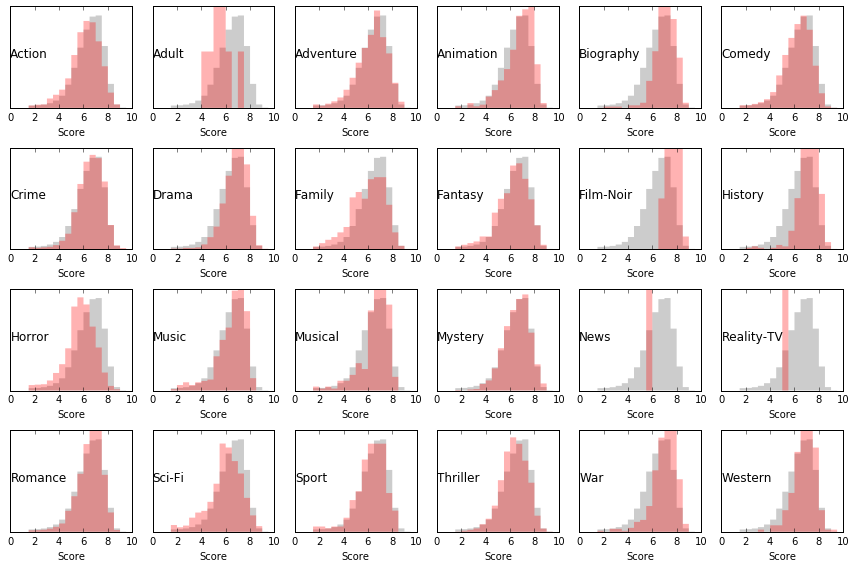

In [25]:
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(12, 8), tight_layout=True)

bins = np.arange(0, 10, .5)

for ax, genre in zip(axes.ravel(), genres):
    ax.hist(data[data[genre] == 1].score, 
            bins=bins, histtype='stepfilled', color='r', ec='none', alpha=.3, normed=True)
               
    ax.hist(data.score, bins=bins, normed=True,
            histtype='stepfilled', ec='none', color='#cccccc',
            zorder=0)
    
    ax.set_yticks([])
    ax.set_xlabel("Score")
    ax.set_ylim(0, .4)
    ax.annotate(genre, xy=(0, .2), ha='left', fontsize=12)

## Two interesting facts

### 1. Decrease in scores
The value of the scores over time decrease and it can be showd by linear regression since the response (Score) in the model is quantitative and we want topredict scores based on the single predictor (Year) . Because the coefficient is negative, we can conclude that the value of the scores over time decrease so in fact newer movies have lower scores comparing to old movies.

Coefficients: 
 [[-0.01679865]]


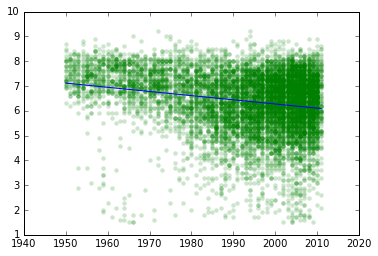

In [26]:
from sklearn import datasets, linear_model
scorex = data['score']
yeary = data['year']
scorey = scorex.reshape(-1, 1)
yearx = yeary.reshape(-1, 1)
regr = linear_model.LinearRegression()
regr.fit(yearx, scorey)
print('Coefficients: \n', regr.coef_)
plt.scatter(yearx, scorey, c='green', lw =0,
                alpha=0.2)
xplt = np.linspace(yearx.min(), yearx.max(),1000)
yplt = regr.coef_ * xplt + regr.intercept_
plt.plot(xplt,yplt.flatten())
plt.savefig('./plots/Linear_Regression.png')
plt.show()

### 2. Comparing Number of Votes
By comparing number of the votes for action and drama movies over year, we can understand that number of the votes increase for both category over the years but number of votes for darama movies is higher than action movies.

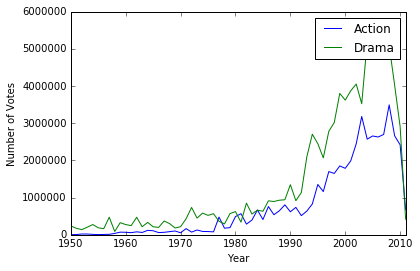

In [27]:
action_movies = data[data.Action]
g=action_movies.groupby(['year']).votes.sum().plot(label='Action')
drama_movies = data[data.Drama]
t=drama_movies.groupby(['year']).votes.sum().plot(label='Drama')
plt.xlabel("Year")
plt.ylabel("Number of Votes")
plt.legend()
plt.savefig('./plots/Number_of_Vots.png')
plt.show()

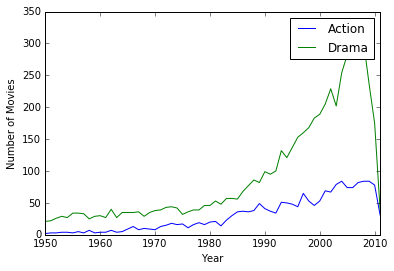

In [28]:
action_count = action_movies.groupby(['year']).Action.count().plot(label='Action')
drama_count = drama_movies.groupby(['year']).Drama.count().plot(label='Drama')
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.legend()
plt.savefig('./plots/Number_of_Movies.png')
plt.show()

## 6.Groupby based on Decades

In [29]:
label =['Action', 'Adult', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western']
for movies in label: 
    
    data[movies] = np.where(data[movies],
                             data.score,nan)

data.head()

,imdbID,title,year,score,votes,runtime,genres,Action,Adult,Adventure,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0111161,The Shawshank Redemption,1994,9.2,619479,142.0,Crime|Drama,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0110912,Pulp Fiction,1994,9.0,490065,154.0,Crime|Thriller,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN
2,tt0137523,Fight Club,1999,8.8,458173,139.0,Drama|Mystery|Thriller,NaN,NaN,NaN,...,NaN,8.8,NaN,NaN,NaN,NaN,NaN,8.8,NaN,NaN
3,tt0133093,The Matrix,1999,8.7,448114,136.0,Action|Adventure|Sci-Fi,8.7,NaN,8.7,...,NaN,NaN,NaN,NaN,NaN,8.7,NaN,NaN,NaN,NaN
4,tt1375666,Inception,2010,8.9,385149,148.0,Action|Adventure|Sci-Fi|Thriller,8.9,NaN,8.9,...,NaN,NaN,NaN,NaN,NaN,8.9,NaN,8.9,NaN,NaN


In [30]:
data['decade'] =  (data.year // 10) * 10
data.head()
dl = data.groupby(['decade'])[genres].median().fillna(0)
dl.head()

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
decade,,,,,,,,,,,,,,,,,,,,,
1950,7.2,0.0,7.2,7.35,7.20,7.2,7.7,7.5,7.1,6.95,...,7.10,7.7,0.0,0.0,7.20,6.55,7.4,7.6,7.50,7.20
1960,7.0,0.0,7.0,7.15,7.85,7.0,7.4,7.6,7.0,6.65,...,6.90,7.3,0.0,0.0,7.20,6.55,7.4,7.2,7.25,7.10
1970,6.7,5.2,6.9,7.40,7.60,7.0,7.0,7.2,7.1,6.85,...,6.95,7.0,0.0,0.0,7.05,6.25,6.9,6.9,7.25,6.90
1980,6.1,0.0,6.5,7.10,7.15,6.1,6.4,6.9,6.6,6.30,...,6.30,6.3,0.0,0.0,6.30,6.10,6.2,6.2,7.10,6.50
1990,5.9,5.3,6.1,6.80,7.00,6.1,6.4,6.7,5.4,6.20,...,6.80,6.5,0.0,5.0,6.40,5.70,5.8,6.2,7.15,6.35


## 7.Normalizing Data
For comparing each genres with other genres, we have to normilize the data set. Because in our data set some columns are 0 and 1, the heat map plot can not demonstrate the diffrence between genres. For this purpose, we have to drop some columns 

In [31]:
dl.drop(['News','Reality-TV','Film-Noir','Adult'], axis=1, inplace=True)

In [32]:
normed = dl /dl.sum(axis=0)
normed.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
decade,,,,,,,,,,,,,,,,,,,,
1950,0.158242,0.154506,0.147887,0.141872,0.156522,0.160752,0.151515,0.157080,0.152580,0.144814,0.155477,0.153684,0.148380,0.161257,0.153355,0.149714,0.157614,0.163090,0.151362,0.153029
1960,0.153846,0.150215,0.143863,0.154680,0.152174,0.154489,0.153535,0.154867,0.145993,0.148728,0.157833,0.151579,0.144201,0.152880,0.153355,0.149714,0.157614,0.154506,0.146317,0.150903
1970,0.147253,0.148069,0.148893,0.149754,0.152174,0.146138,0.145455,0.157080,0.150384,0.143836,0.147232,0.147368,0.145246,0.146597,0.150160,0.142857,0.146965,0.148069,0.146317,0.146652
1980,0.134066,0.139485,0.142857,0.140887,0.132609,0.133612,0.139394,0.146018,0.138310,0.144814,0.134276,0.134737,0.131661,0.131937,0.134185,0.139429,0.132055,0.133047,0.143290,0.138151
1990,0.129670,0.130901,0.136821,0.137931,0.132609,0.133612,0.135354,0.119469,0.136114,0.138943,0.134276,0.143158,0.142111,0.136126,0.136315,0.130286,0.123536,0.133047,0.144299,0.134963


## 8.Plotting

In [ ]:
import matplotlib.colors as mcolors
fig, ax = plt.subplots()
heatmap = ax.pcolor(normed.transpose(), cmap=plt.cm.Blues, alpha=0.8)

fig = plt.gcf()
fig.set_size_inches(5, 20)    
ax.set_frame_on(False)
ax.xaxis.tick_top()
ax.set_xticks(np.arange(normed.shape[0]) + 0.5, minor=False)
ax.set_yticks(np.arange(normed.shape[1]) + 0.5, minor=False)

ax.set_xticklabels(normed.index, minor=False)
ax.set_yticklabels(normed, minor=False)
ax.grid(False)
ax = plt.gca()

for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
ax.invert_yaxis()
fig.tight_layout()
plt.savefig('./plots/heatmap.png')